In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import global_variables as g_vars
import global_functions as g_funcs

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [3]:
raw_df = pd.read_csv(g_vars.train_path)
test_raw_df = pd.read_csv(g_vars.test_path)

g_funcs.handle_missing_values(raw_df)
g_funcs.handle_missing_values(test_raw_df)

In [4]:
raw_df.SalePrice = np.log(raw_df.SalePrice)

In [5]:
raw_df['TotalSF'] = raw_df['GrLivArea'] + raw_df['TotalBsmtSF'] + raw_df['GarageArea'] + raw_df['EnclosedPorch'] + raw_df['ScreenPorch']
test_raw_df['TotalSF'] = test_raw_df['GrLivArea'] + test_raw_df['TotalBsmtSF'] + test_raw_df['GarageArea'] + test_raw_df['EnclosedPorch'] + test_raw_df['ScreenPorch']

In [6]:
one_hot_encoded_df = pd.get_dummies(data=raw_df)
test_one_hot_encoded_df = pd.get_dummies(data=test_raw_df)

test_missing_features = one_hot_encoded_df.columns.difference(test_one_hot_encoded_df.columns)
test_missing_features = test_missing_features.delete(test_missing_features.get_loc('SalePrice'))
one_hot_encoded_df.drop(test_missing_features, axis=1, inplace=True)

one_hot_encoded_df.drop('SalePrice', axis=1, inplace=True)
X_train, X_valid, y_train, y_valid = train_test_split(one_hot_encoded_df, raw_df.SalePrice, random_state=50)

In [7]:
def fit_and_score_rf(rf):
    rf.fit(X=X_train, y=y_train)
    y_pred = rf.predict(X_valid)
    print(np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
    return rf

In [8]:
rf = RandomForestRegressor(n_estimators=80)
rf = fit_and_score_rf(rf)

0.13217211572255502


In [9]:
preds = np.stack([t.predict(X_valid) for t in rf.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid.iloc[0]

(array([12.27839331, 12.27839331, 12.32385568, 12.09848743, 12.18586994,
        12.47800636, 12.13939851, 12.27839331, 12.16525065, 12.41044104,
        12.41074663, 12.35449265, 12.10625231, 12.38797745, 12.10348606,
        12.34583459, 12.15477935, 12.18586994, 12.01364014, 12.06681058,
        12.47800636, 12.35449265, 12.32385568, 12.44901882, 12.34583459,
        12.37370349, 12.17540547, 12.26904744, 12.32385568, 12.06104687,
        12.32385568, 12.32385568, 12.35978037, 12.17664898, 12.21849517,
        12.48156194, 12.11176197, 12.10699237, 12.32385568, 12.47418956,
        12.38797745, 12.26434155, 12.15477935, 12.55292652, 12.30138283,
        12.01364014, 12.38797745, 12.3327053 , 12.16002871, 12.01364014,
        12.32385568, 12.27139211, 12.3327053 , 12.38797745, 12.23027733,
        12.16525065, 12.4073795 , 12.35449265, 12.45254202, 12.32385568,
        12.18841771, 12.4073795 , 12.26434155, 12.26904744, 12.55292652,
        12.09848743, 12.16002871, 12.16002871, 12.3

In [10]:
# plt.plot([g_funcs.rmse(y_valid, np.mean(preds[:i+2])) for i in range(100)])

preds_score = []

for i in range(100):
    rf = RandomForestRegressor(n_estimators=i+1)
    rf.fit(X=X_train, y=y_train)
    y_pred = rf.predict(X_valid)
    preds_score.append(np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

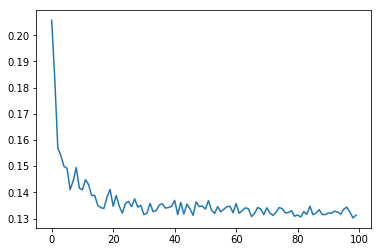

In [11]:
plt.plot(preds_score)

In [12]:
rf = RandomForestRegressor(n_estimators=15, max_features=0.4)
rf = fit_and_score_rf(rf)

0.1407239517388731


In [13]:
feat_importance = pd.DataFrame({'cols': one_hot_encoded_df.columns, 'imp': rf.feature_importances_}).sort_values('imp', ascending=False)

In [14]:
feat_importance[:10]

,cols,imp
4,OverallQual,0.266145
37,TotalSF,0.243183
16,GrLivArea,0.115707
161,ExterQual_TA,0.049441
6,YearBuilt,0.045274
26,GarageCars,0.028387
13,1stFlrSF,0.021208
7,YearRemodAdd,0.020679
9,BsmtFinSF1,0.012243
3,LotArea,0.011769
